In [ ]:
# importing the libraries
import pandas as pd
import numpy as np

In [ ]:
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.metrics import accuracy_score
from tqdm import tqdm

In [ ]:
import torch
from torch.autograd import Variable
#newly added for FashinMNIST Dataset
#####
from torch.utils.data import Dataset
from torchvision import datasets
#####
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout
from torch.optim import Adam, SGD

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torch.nn.functional as F
import torchvision.transforms as transforms
import matplotlib.pyplot as plt


In [ ]:
"""
Check whether a CUDA enabled GPU is available
else use CPU
"""
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
transform = transforms.Compose([transforms.ToTensor(),
  transforms.Normalize((0.5,), (0.5,))
])

In [ ]:
"""
Using the EMNIST datase has broken the program
using FashionMNIST dataset instead"""
# training_data = torchvision.datasets.EMNIST(root='contents/', download=True, transform=transform, train=True,split='balanced')
# test_data = torchvision.datasets.EMNIST(root='contents/', download=True,transform=transform, train=False,split='balanced')
training_data = datasets.FashionMNIST(root='contents/', download=True, transform=transform, train=True)
test_data = datasets.FashionMNIST(root='contents/', download=True, transform=transform, train=True)

100%|██████████| 26421880/26421880 [00:01<00:00, 18397843.45it/s]


Extracting contents/FashionMNIST/raw/train-images-idx3-ubyte.gz to contents/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 304418.64it/s]


Extracting contents/FashionMNIST/raw/train-labels-idx1-ubyte.gz to contents/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5417775.34it/s]


Extracting contents/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to contents/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 17669621.11it/s]


Extracting contents/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to contents/FashionMNIST/raw



In [ ]:
train_loader = torch.utils.data.DataLoader(dataset = training_data,
                                           batch_size = 128,
                                           shuffle = True)

test_loader = torch.utils.data.DataLoader(dataset = test_data,
                                           batch_size = 128,
                                           shuffle = True)

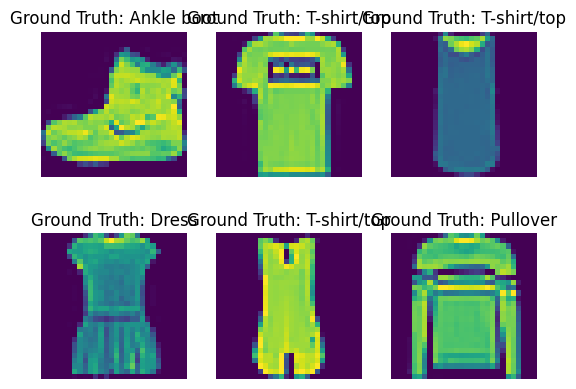

In [ ]:
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(training_data.data[i])
  plt.title('Ground Truth: {}'.format(training_data.classes[training_data.targets[i]]))
  plt.axis('off')


In [ ]:
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size= 5,stride = 1)
        self.conv2 = nn.Conv2d(32, 64, 5, 1)
        self.fc = nn.Linear(64*20*20, 47)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
